[612.31372599 433.69023645]


C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(raw

C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(raw

C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(raw

C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
C:\Users\benlc\AppData\Local\Temp\ipykernel_18880\2212974222.py:88: RuntimeWarning: All-NaN slice encountered
  med_derot = np.nanmedian(derotcube, axis=0)


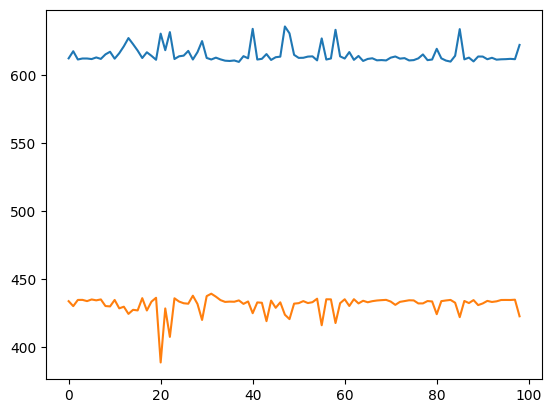

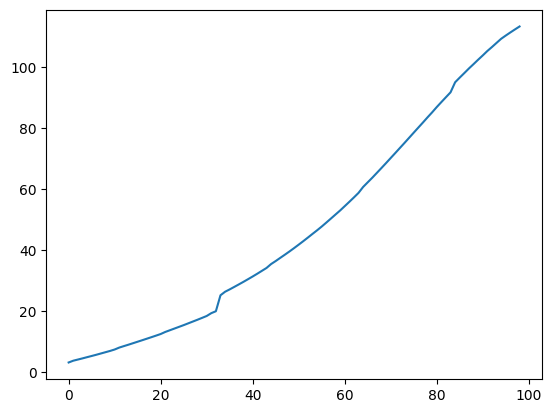

[612.31372599 433.69023645]


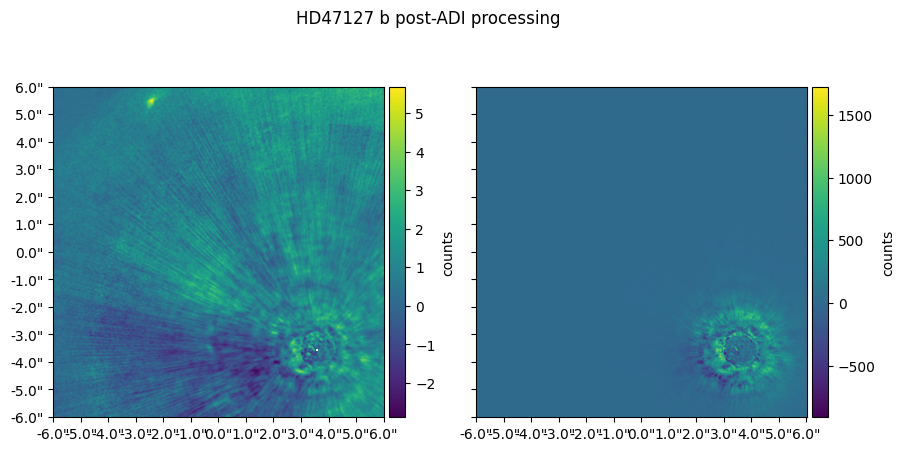

In [3]:
#import packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import glob
import pyklip
import pyklip.klip as klip
from pyklip.kpp.utils.mathfunc import *
from pyklip.kpp.metrics.crossCorr import calculate_cc
import astropy.units as u
from importlib import reload
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pyklip.kpp.stat.stat_utils import get_image_stat_map
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift
from photutils.centroids import centroid_2dg
%matplotlib inline

#define functions for display
def add_label(ax,txt,imsz):
    ax.text(5,imsz-10,txt,c='w',size=18)
    
def add_cbar(im,ax,f,lb="counts"):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right',size='5%',pad=0.05)
    f.colorbar(im,cax=cax,orientation='vertical',label=lb)
    
def set_display(stampsz,stampcen,tickint=1):
    mnx=int(stampcen[0]-stampsz/2)
    mxx=int(stampcen[0]+stampsz/2+1)
    mny=int(stampcen[1]-stampsz/2)
    mxy=int(stampcen[1]+stampsz/2+1)
    ranges=(mnx,mxx,mny,mxy)
    platescale=.02 ###for GPI its .01414
    nticks=np.floor(stampsz*platescale/2/tickint)
    ticklabels=np.arange(-1*nticks,nticks+1)*tickint
    ticklabels_str=[str(lab)+'\"' for lab in ticklabels]
    ticks = ticklabels/platescale + stampsz/2
    return(ranges,ticks,ticklabels_str)

#define ADI process
def cADI_NIRC2(flist, write_intermediate=False):
    
    #get data from fits, create raw image arrays
    rawcube = np.zeros((len(flist),1024,1024))
    aligned_cube = np.zeros((len(flist),1024,1024))
    cccube = np.zeros((1024,1024))
    subcube = np.zeros((len(flist),1024,1024))
    derotcube = np.zeros((len(flist),1024,1024))
    SNR_map = np.zeros((1024,1024))     
    ctrs=[]
    vertangs = []
    
    for i in np.arange(len(flist)):
        rawcube[i,:,:] = fits.getdata(flist[i])
        head = fits.getheader(flist[i],ext=0)
        
        if i == 0:
            ctrs.append((607, 433) + centroid_2dg(rawcube[0,607:617,433:439],error=None,mask=None)) #dont use whole image, cut 10x10
            print(ctrs[0]) #plot,, find center from first
            
            #check each centroid post-cross-correlation
            fits.writeto('rawcube.fits',rawcube[0,:,:],overwrite=True)
            aligned_cube[0,:,:] = rawcube[0,:,:]
            x_grid,y_grid= np.meshgrid(np.arange(-10,10),np.arange(-10,10))
            kernel_gauss = gauss2d(x_grid,y_grid, amplitude = 40.0, xo = 0, yo = 0, sigma_x = 1.0, sigma_y = 1.0)
        else:              
            shifts, error, diffphase = phase_cross_correlation(rawcube[0,:,:], rawcube[i,:,:],upsample_factor=100,normalization=None)
            #print(shifts)
            aligned_cube[i,:,:] = fourier_shift(rawcube[i,:,:],shifts)
            ctrs.append((607, 433) + centroid_2dg(rawcube[i,607:617,433:439],error=None,mask=None))
        va = head['ROTPPOSN'] - head['INSTANGL'] + head['PARANG']
        vertangs.append(va) ##check paper
        #print(vertangs[i])
        
    fits.writeto('aligned_cube.fits',aligned_cube[1,:,:],overwrite=True)
    medcube = np.nanmedian(aligned_cube,axis=0)
    fits.writeto('medcube.fits',medcube,overwrite=True)
    
    for i in np.arange(len(flist)):
        subcube[i,:,:] =  rawcube[i,:,:] - medcube
        derotcube[i,:,:] = klip.rotate(subcube[i,:,:], vertangs[i], ctrs[0]) ##check tutorial
        
    fits.writeto('subcube.fits',subcube[1,:,:],overwrite=True)
        
    med_derot = np.nanmedian(derotcube, axis=0)
    fits.writeto('med_derotcube.fits',med_derot,overwrite=True)
    cccube[:,:] = calculate_cc(med_derot[:,:],kernel_gauss,spectrum=None,nans2zero=True)
    SNR_map[:,:] = get_image_stat_map(cccube,
                                               centroid = ctrs[0],
                                               r_step=1,
                                               Dr = 1,
                                               type = "SNR")
    fits.writeto('snr_cccube.fits',SNR_map,overwrite=True)
    
    plt.plot(ctrs)
    plt.show()
    plt.plot(vertangs)
    plt.show()
    
    return SNR_map, med_derot, ctrs[0]


datadir = 'HD47127_data/Dec_2023/'
flist = sorted(glob.glob(datadir + '*.fits'))

flist_adi, med, cen = cADI_NIRC2(flist, write_intermediate=False)
print(cen)
stampsz = 600
rg, ticks, ticklabels_str = set_display(stampsz, stampcen=cen)
(mnx,mxx,mny,mxy) = rg


f,(ax1, ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,5))
f.suptitle("HD47127 b post-ADI processing")
im1 = ax1.imshow(flist_adi[mnx:mxx,mny:mxy],origin='lower')
im2 = ax2.imshow(med[mnx:mxx,mny:mxy],origin='lower')
plt.xticks(ticks,labels=ticklabels_str)
plt.yticks(ticks,labels=ticklabels_str)
add_cbar(im1,ax1,f)
add_cbar(im2,ax2,f)

#NAXIS: num of axes
#NAXIS1: length of axis
#RA
#DEC
#TARGRA
#TARGDEC
#RAOFF, DECOFF: DCS RA, Dec offset
#PARANG: parallactic angle astrometric
#CENWAVE: central wavelength of passband
#MINWAVE, MAXWAVE
#EFFWAVE: effective wavelength of passband
#LTM1_1, LTM2_2, CD1_1, CD1_2, CD2_1, CD2_2
#ELAPTIME: total integration time
#PSFCX, PSFCY: center of PSF in pixels
#STARCX, STARCY: center of star in pixels
#PIXSCALE, PIXSCAL1, PIXSCAL2: arcsec per pixel

#KLIP/PCA LATER!!
#position + brightness of companion
